In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [151]:
IMG_HEIGHT = 32

In [152]:
# arrays that hold the shape
small_shape = np.ones((7,7,3))
large_shape = np.ones((14,14,3))

from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

# masks for the shape
small_square = np.ones((7,7,3))
large_square = np.ones((14,14,3))
small_circle = np.zeros((7,7,3))
large_circle = np.zeros((14,14,3))
# fill circle
rr, cc = disk((3, 3), 4, shape=small_circle.shape)
small_circle[rr, cc, :] = (1, 1, 1)
rr, cc = disk((7, 7), 7, shape=large_circle.shape)
large_circle[rr, cc, :] = (1, 1, 1)
small_triangle = np.zeros((7,7,3))
# fill polygon
poly = np.array((
    (8, -1),
    (-1, 3),
    (8, 7),
))
rr, cc = polygon(poly[:, 0], poly[:, 1],small_triangle.shape)
small_triangle[rr, cc, :] = 1
large_triangle = np.zeros((14,14,3))
poly = np.array((
    (17, -2),
    (-1, 7),
    (15, 14),
))
rr, cc = polygon(poly[:, 0], poly[:, 1],large_triangle.shape)
large_triangle[rr, cc, :] = 1
small_bar = np.ones((3,7,3))
large_bar = np.ones((6,14,3))

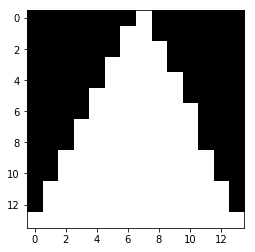

In [153]:
# plt.imshow(small_bar)
# plt.imshow(small_square)
# plt.imshow(small_circle)
# plt.imshow(large_circle)
# plt.imshow(small_triangle)
plt.imshow(large_triangle)
# plt.imshow(large_bar)
# plt.imshow(large_square)

In [154]:
images = np.ones([1000,IMG_HEIGHT,IMG_HEIGHT,3])

In [155]:
import random
random.random()

0.0666137520638973

In [156]:
images = np.random.random([1000,1,1,3]) * images

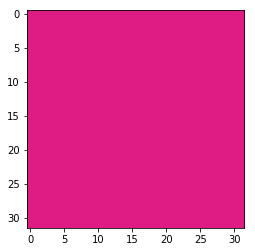

In [157]:
plt.imshow(images[int(random.random()*1000)])

In [158]:
masks = np.zeros([1000,2,IMG_HEIGHT,IMG_HEIGHT,]).astype(bool)

In [159]:
idx = large_triangle.sum(axis=-1)==3
for i in range(1000):
    x, y = random.randint(0,14), random.randint(0,14)
    images[i][x:x+14,y:y+14][idx] = large_triangle[idx] * np.random.random((3,))
    masks[i][0][x:x+14,y:y+14][idx] = large_triangle[idx].sum(axis=-1)

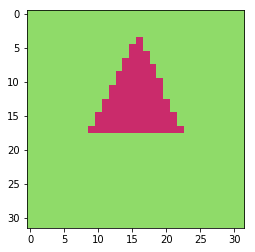

In [160]:
plt.imshow(images[int(random.random()*1000)])

In [161]:
idx = large_circle.sum(axis=-1)==3
for i in range(1000):
    x, y = random.randint(0,14), random.randint(0,14)
    images[i][x:x+14,y:y+14][idx] = large_circle[idx] * np.random.random((3,))
    masks[i][1][x:x+14,y:y+14][idx] = large_circle[idx].sum(axis=-1)
    masks[i][0][x:x+14,y:y+14][idx] = masks[i][0][x:x+14,y:y+14][idx] & ~large_circle[idx].sum(axis=-1).astype(np.bool)

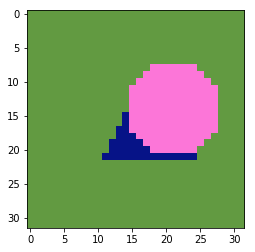

In [162]:
plt.imshow(images[int(random.random()*1000)])

In [163]:
idx

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False, False],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         

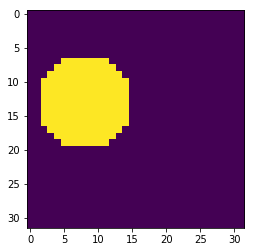

In [164]:
r = random.random()
z= int(r*1000)
plt.imshow(images[z])
plt.imshow(masks[z,0])
plt.imshow(masks[z,1])

In [165]:
# you dont need to worry about separate pixel groups :) 
# but you can if you want.  it doesn't matter.

In [166]:
def IOU(t1, t2):
    return np.sum(np.minimum(t1,t2))/np.sum(np.maximum(t1,t2))

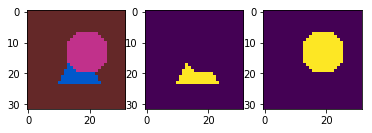

In [167]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(images[0])
axarr[1].imshow(masks[0,0])
axarr[2].imshow(masks[0,1])

In [168]:
# initial aperture should be about a third of image size i guess
dataset = []
third = 12
# f, axarr = plt.subplots(27+1-9,27+1-9)
tempmasks = []
# for h in range(1000):
for i in range(third, IMG_HEIGHT+1, 4):
    for j in range(third, IMG_HEIGHT+1, 4):
#         slice = images[h][i-third:i,j-third:j]
        tempmask = np.zeros(masks[0,1].shape)
        tempmask[i-third:i,j-third:j] = 1
#         tempmask[i-third:i,j-third:j] = masks[0,1][i-third:i,j-third:j]
#         axarr[i-third][j-third].imshow(tempmask)
#         dataset.append([images[], tempmask, IOU(tempmask,masks[h,1])])
        tempmasks.append(tempmask)
#             print("%.2f" % IOU(tempmask,masks[0,1]),end=" ")
    print()

In [169]:
len(tempmasks)

36

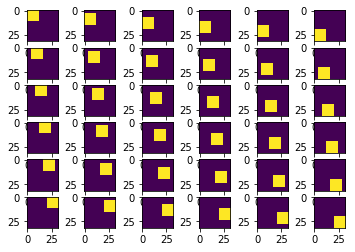

In [172]:
# plt.imshow(dataset[-9][0])
# plt.imshow(dataset[-9][1])
# print(dataset[-9][2])
f, axarr = plt.subplots(6,6)
i, j = 0, 0
for mask in tempmasks:
    axarr[i][j].imshow(mask)
    i += 1
    if i % 6 == 0:
        i = 0
        j += 1

In [173]:
images.shape

(1000, 32, 32, 3)

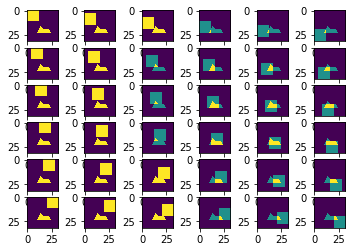

In [176]:

f, axarr = plt.subplots(6,6)
i, j = 0, 0
for mask in tempmasks:
    axarr[i][j].imshow(mask+masks[0,0])
    i += 1
    if i % 6 == 0:
        i = 0
        j += 1

In [177]:
# get the max of IOU for mask1, IOU for mask 2, and 0.0001
dataset = []
for i in range(len(images)):
    for mask in tempmasks:
#         print(IOU(mask, masks[i,0]))
#         print(IOU(mask, masks[i,1]))
#         print(0.0001)
        a = [IOU(mask, masks[i,0]),
         IOU(mask, masks[i,1]),
         0.0001]
        ind = a.index(max(a))
        if ind == 2:
            z = np.zeros(mask.shape)
        else:
            z = masks[i,ind]
        dataset.append(np.concatenate([images[i], np.expand_dims(mask,-1), np.expand_dims(z,-1)],axis=-1))
    


In [178]:
print(dataset[0].shape)

(32, 32, 5)


In [179]:
np.array(dataset).shape

(36000, 32, 32, 5)

In [180]:
np.save("simple_shapes_32", np.array(dataset), )

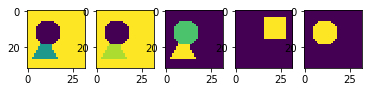

In [181]:
q = np.array(dataset)
f, axarr = plt.subplots(1,5)
r = random.random()
z = int(r*25000)
for i in range(5):
    axarr[i].imshow(q[z,:,:,i])

In [ ]:
# ~~~~~~~~~~ simple shapes ends here ~~~~~~~~~ #

In [77]:
[0,1,2,].index(max([1,2,3]))

ValueError: 3 is not in list

In [976]:
# random edge filter
from scipy import ndimage
struct = ndimage.generate_binary_structure(2, 2)
erode = ndimage.binary_erosion(a, struct)
edges = a ^ erode

In [977]:
edges

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [978]:
edges = edges * np.random.random((10,10))

In [979]:
edges = -edges

In [936]:
edges

array([[-0.93835534, -0.85930791, -0.11197783, -0.34990005, -0.19516651,
        -0.06485914, -0.62903146, -0.60061234, -0.35157552, -0.97545897],
       [-0.45469294,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.68799516],
       [-0.84058936,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.58372174],
       [-0.87873531,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.67485158],
       [-0.54506108,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.93021067],
       [-0.27290611,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.82968792],
       [-0.49759565,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [937]:
a+edges

array([[0.06164466, 0.14069209, 0.88802217, 0.65009995, 0.80483349,
        0.93514086, 0.37096854, 0.39938766, 0.64842448, 0.02454103],
       [0.54530706, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.31200484],
       [0.15941064, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.41627826],
       [0.12126469, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.32514842],
       [0.45493892, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.06978933],
       [0.72709389, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.17031208],
       [0.50240435, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.12541745],
       [0.84011824, 1.        , 1.       

In [939]:
# random filter
a-np.random.random((10,10))

array([[0.23939449, 0.96637823, 0.51250014, 0.80114093, 0.6438897 ,
        0.40646365, 0.56386676, 0.28345779, 0.25676879, 0.55358446],
       [0.31122656, 0.9706329 , 0.28632483, 0.9690255 , 0.17412347,
        0.68186556, 0.44483471, 0.2733726 , 0.22190698, 0.80840366],
       [0.3669731 , 0.83079964, 0.83348108, 0.46618115, 0.75326983,
        0.06346798, 0.26720562, 0.26984127, 0.82537789, 0.5494539 ],
       [0.08582359, 0.88287148, 0.3580596 , 0.9945178 , 0.8782696 ,
        0.30496187, 0.9116651 , 0.23004882, 0.82077784, 0.71472731],
       [0.27263861, 0.43375975, 0.32365084, 0.30885419, 0.36680564,
        0.27409714, 0.48648442, 0.20324657, 0.03436515, 0.15230195],
       [0.50572478, 0.11360509, 0.28612193, 0.24665266, 0.03171532,
        0.40148414, 0.07445893, 0.51476058, 0.74046486, 0.86777296],
       [0.46283868, 0.51818943, 0.3120803 , 0.35750004, 0.97709862,
        0.83772047, 0.46991469, 0.57230136, 0.06942187, 0.23271238],
       [0.16531023, 0.92702717, 0.2817787

In [961]:
# radial filter
x_axis = np.linspace(1, -1, 56)[:, None]
y_axis = np.linspace(1, -1, 56)[None, :]

arr = np.sqrt(x_axis ** 2 + y_axis ** 2)

In [962]:
arr/=arr.max()

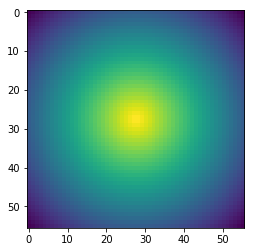

In [963]:
plt.imshow((1-arr))

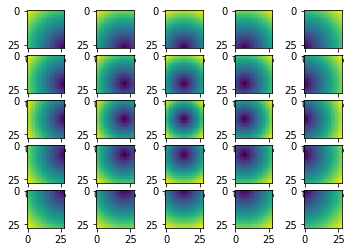

In [973]:

f, axarr = plt.subplots(5,5)
for i in range(0,57-28,7):
    for j in range(0,57-28,7):
        radial_mask = arr[i:i+28,j:j+28]
#         print(arr[i:i+28,j:j+28])
        axarr[i//7][j//7].imshow(radial_mask)

In [974]:
radial_mask

array([[0.01818182, 0.04065578, 0.06555548, 0.09090909, 0.11642044,
        0.14200454, 0.16762808, 0.19327538, 0.21893808, 0.24461135,
        0.27029216, 0.29597856, 0.3216692 , 0.34736315, 0.37305972,
        0.3987584 , 0.42445882, 0.45016067, 0.47586372, 0.50156779,
        0.52727273, 0.55297841, 0.57868474, 0.60439164, 0.63009903,
        0.65580687, 0.68151508, 0.70722365],
       [0.04065578, 0.05454545, 0.07496556, 0.09791209, 0.12196734,
        0.1465865 , 0.17152693, 0.19666643, 0.22193737, 0.24729946,
        0.27272727, 0.29820399, 0.32371807, 0.34926132, 0.37482778,
        0.40041301, 0.42601362, 0.45162699, 0.47725108, 0.50288424,
        0.52852516, 0.55417275, 0.57982614, 0.60548457, 0.63114745,
        0.65681425, 0.68248452, 0.70815789],
       [0.06555548, 0.07496556, 0.09090909, 0.11059568, 0.13236563,
        0.15534552, 0.17907014, 0.20327891, 0.22781753, 0.25258989,
        0.27753341, 0.30260576, 0.32777739, 0.35302705, 0.37833913,
        0.40370188, 0.4291

In [981]:
# pointwise filter
pointwise_filters = np.ones((28*28,28,28))
for i in range(28):
    for j in range(28):
        pointwise_filters[j+28*i,i,j] = 0
        

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

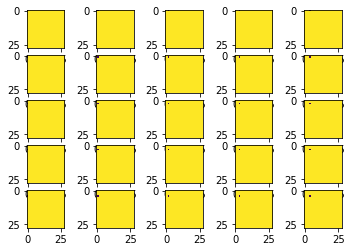

In [986]:
dataset2 = []
# record the pointwise masks, and 1 or 0 whether point is part of obj
f, axarr = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        print(pointwise_filters[j+28*i].astype(np.int))
        axarr[i][j].imshow(pointwise_filters[j+28*i])